<a href="https://colab.research.google.com/github/silviaarellanogarcia/HackEPS2022/blob/main/missi%C3%B3_negra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌚 MISIÓ NEGRA 🌚

## Objectius i preparació de l'entorn

Està popularitzat dir que no sabem el comportament de les xarxes neuronals... És això cert? Apliqueu tècniques de eXplainable Artificial Intelligence a un model que teniu [aquí](http://84.88.176.103:10003/docs#/)... Utilitzeu imatges del dataset B. Amb 2 o 3 imatges explicant el que passa en tenim suficient ok_hand

Us deixem aquí uns recursos package que de segur us seran ben útils!

- SHAP
- Captum
- Interpretable Machine Learning

In [ ]:
# Llibreries necessàries
import requests 
import pandas as pd 
import numpy as np

In [ ]:
# Donar accés a Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Extracció de les dades

In [ ]:
# !unzip "gdrive/MyDrive/HackEPS2022/data/B.zip" -d "gdrive/MyDrive/HackEPS2022/data/negra"

In [ ]:
# Lectura del csv resum del dataset
train_df = pd.read_csv("gdrive/MyDrive/HackEPS2022/data/negra/B/train.csv")
train_df.shape

(9457, 11)

In [ ]:
train_df.iloc[0].image_path

'4aaf06a9-frame0-00-08.95.jpg'

## API responses

In [ ]:
import matplotlib.pyplot as plt

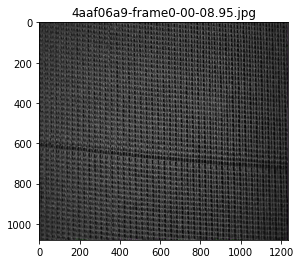

{'output': 0.9575809836387634}


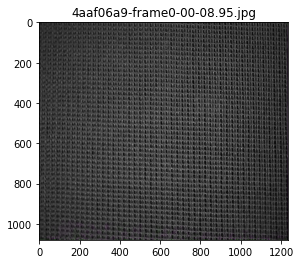

{'output': 0.047162242233753204}


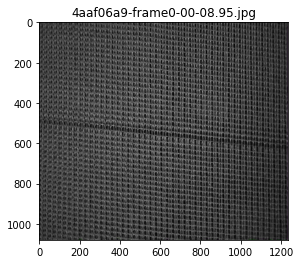

{'output': 0.9575809836387634}


In [ ]:
for i in range(5):
    # Obtenció del valor retornat per la API
    try:
        files = {'file': open(f'gdrive/MyDrive/HackEPS2022/data/negra/B/data/{train_df.iloc[i].image_path}', 'rb')}
    except:
        # Si la imatge a la que s'intenta accedir no existeix, busquem la seguent
        continue
        
    response = requests.post('http://84.88.176.103:10003/predict', files=files)

    # Llegir i mostrar una imatge
    img = plt.imread(f'gdrive/MyDrive/HackEPS2022/data/negra/B/data/{train_df.iloc[i].image_path}')
    plt.imshow(img)
    plt.title(f'{train_df.iloc[0].image_path}')
    plt.show()

    # Obtenció del valor retornat per la API
    try:
        data = response.json()     
        print(data)                
    except requests.exceptions.RequestException:
        print(response.text)

# Solució

El valor retornat per la API indica si el teixit conté un error o no. En cas que el teixit sigui correcte, el output s'apropa a 0, mentre que quan hi ha un error, s'apropa a 1.